Importing our required libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Reading our image and converting to grayscale

In [2]:
path = 'C:\Danyal\Work\FAST\Semester 5\Digital Image Processing\Assignment # 2\Q-3.jpg'
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)


Applying sobel operator to get the corners of the image

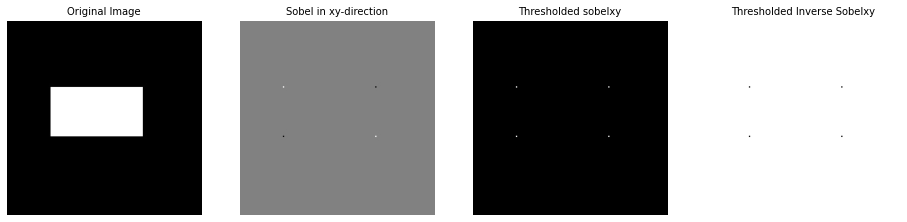

In [3]:

# Apply Sobel Both in  X and Y direction
sobelxy = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3) 
#Tresholding the absolute value of sobelxy
threshold, imgb1 = cv2.threshold(abs(sobelxy), 80, 254, cv2.THRESH_BINARY)
#Tresholding the absolute value of sobelxy in inverse colours
threshold, imga1 = cv2.threshold(abs(sobelxy), 80, 254, cv2.THRESH_BINARY_INV)

#Displaying our image
fig, axs = plt.subplots(1,4,figsize=(16,8))

axs[0].imshow(img,cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image',fontsize='medium')

axs[1].imshow(sobelxy,cmap='gray')
axs[1].axis('off')
axs[1].set_title('Sobel in xy-direction',fontsize='medium')

axs[2].imshow(imgb1,cmap='gray')
axs[2].axis('off')
axs[2].set_title('Thresholded sobelxy',fontsize='medium')

axs[3].imshow(imga1, cmap = 'gray')
axs[3].axis('off')
axs[3].set_title('Thresholded Inverse Sobelxy',fontsize='medium')


plt.show()

Calculating the length and width and area

In [4]:
#Defining global variables
counter = 0
length = 20
width = 10

#Function to calculate the length and width
def calcSides():
    global counter, length, width
    for x in imgb1:
        count = 0
        for y in x:
            #if pixel is white
            if y > 200:
                index_x = counter + 20
                index_y = count + 10
                #Loop to increment length till next pixel found on the same x axis
                while True:
                    if imgb1[index_x][count] > 200:
                        break
                    length += 1
                    index_x += 1
                #Loop to increment width till next pixel found on the same y axis
                while True:
                    if imgb1[counter][index_y + 1] > 200:
                        break
                    width += 1
                    index_y += 1
                #return to stop infinite looping
                return
            count += 1
        counter += 1 
calcSides()

#Writing the area of rectangle on the image
cv2.putText(img, str(length * width), (100, 150), 1, 2, 0)

#Displaying image
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()